In [1]:
import pandas as pd
data = pd.read_csv("merged_dataset.csv")
data

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [2]:
data.shape

(32337, 2)

#Finding Missing Values


In [3]:
missing_values = data.isnull().sum()
missing_values

,0
Text,0
Language,0


#Finding Duplicate Values

In [34]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 207


In [80]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import re

# Load the dataset (replace with your actual file path)
data = pd.read_csv('merged_dataset.csv')

# Step 1: Remove duplicates based on the 'Text' column
data_cleaned = data.drop_duplicates(subset=['Text'], keep='first').copy()

# Step 2: Convert the 'Text' column to lowercase and remove extra white spaces using regex
data_cleaned['Text'] = data_cleaned['Text'].apply(lambda x: re.sub(r'\s+', ' ', x.strip().lower()) if isinstance(x, str) else x)

# Step 3: Initialize LabelEncoder and encode the 'Language' column
le = LabelEncoder()
data_cleaned['Language'] = le.fit_transform(data_cleaned['Language'])

# Step 4: Saved the cleaned and encoded dataset to a new CSV file
data_cleaned.to_csv('cleaned_encoded_dataset.csv', index=False)

# Print the first few rows to inspect the result
# print(data_cleaned.head())
data_cleaned

,Text,Language
0,klement gottwaldi surnukeha palsameeriti ning ...,5
1,sebes joseph pereira thomas på eng the jesuits...,24
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,27
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,26
4,de spons behoort tot het geslacht haliclona en...,3
...,...,...
32332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,13
32333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,13
32334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,13
32335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,13


#Feature Scaling -- Bag of Words

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for Bag of Words
vectorizer = CountVectorizer(max_features=5000)  # Limit to top 5000 words to save memory

# Perform feature extraction on the 'Text' column
X = vectorizer.fit_transform(data_cleaned['Text'])


# Convert sparse matrix to DataFrame for inspection (only if necessary)
X_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

# Print a few rows of the resulting DataFrame (just to check)
# print(X_df.head())
X_df

,000,10,100,11,12,13,15,16,18,20,...,하는,하였다,하지만,한다,한편,함께,했다,현재,호드의,힘을
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Using TF-IDF

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer for TF-IDF feature extraction
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words to save memory

# Perform feature extraction on the 'Text' column
X = vectorizer.fit_transform(data_cleaned['Text'])


# Convert sparse matrix to DataFrame for inspection (only if necessary)
X_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

# Print a few rows of the resulting DataFrame (just to check)
# print(X_df.head())
X_df


,000,10,100,11,12,13,15,16,18,20,...,하는,하였다,하지만,한다,한편,함께,했다,현재,호드의,힘을
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Using N-grams

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=5000)  # For bigrams (1,2); adjust as needed

# Perform feature extraction on the 'Text' column
X = vectorizer.fit_transform(data_cleaned['Text'])


# Convert sparse matrix to DataFrame for inspection (only if necessary)
X_df = pd.DataFrame.sparse.from_spmatrix(X, columns=vectorizer.get_feature_names_out())

# Print a few rows of the resulting DataFrame (just to check)
# print(X_df.head())
X_df

,000,10,100,11,12,13,15,18,20,2001,...,하고,하는,하였다,하지만,한다,함께,했다,현재,호드의,힘을
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32121,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#Applying the Algorithms
#1.Logistic Regression

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


X = data_cleaned['Text']  # Feature (Text)
y = data_cleaned['Language']  # Target (Encoded Language)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Performance metrics for classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9259259259259259
Precision: 0.9511789077525877
Recall: 0.9126569624603802
Confusion Matrix:
[[282  14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 185   0   0   8   0   0   0   0   0   0   1   3   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   5  73   0   1   1   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   7   0   0   0   0]
 [  0   5   0 325   2   3   2   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   9   0   0 467   0   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0]
 [  0   7   0   0   7 212   2   0   0   0   0   1   2   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7   0   2   0   0 408   0   0   0   0   3   0   0   0   0   0   0
    0   0   0   0   0   2   0   0   0   0   0   0]
 [  0   3   0   1   0

#2.Decision Trees

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


X = data_cleaned['Text']  # Feature (Text)
y = data_cleaned['Language']  # Target (Encoded Language)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Decision Tree - Accuracy: {accuracy}")
print(f"Decision Tree - Precision: {precision}")
print(f"Decision Tree - Recall: {recall}")
print(f"Decision Tree - Confusion Matrix:\n{conf_matrix}")


Decision Tree - Accuracy: 0.8714596949891068
Decision Tree - Precision: 0.8948722581410472
Decision Tree - Recall: 0.8573602134401104
Decision Tree - Confusion Matrix:
[[280   0   0   0   1   0   0   0   0   0   0   0   1  14   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  59   0   0  12   0   0   0   0   0   0   2  18 106   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  63   0   2   1   3   3   0   0   0   0   0   4   0   0   0   0
    0   1   0   0   0   0   0  11   0   0   0   0]
 [  0   0   0 322   1   1   2   0   0   0   1   0   0   4   0   0   0   0
    0   0   0   0   0   4   0   3   0   0   0   0]
 [  0   2   0   1 451   2   0   0   0   0   0   6   0  11   0   0   0   0
    0   0   1   0   1   1   0   0   0   1   1   0]
 [  0   0   1   0  11 196   3   5   0   0   0   1   0  13   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   1   1   4   0   0 377   2   0   0   0   8   0   6   0   7   0   0
    5   

#3.Random Trees

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer


X = data_cleaned['Text']  # Feature (Text)
y = data_cleaned['Language']  # Target (Encoded Language)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"Random Forest - Accuracy: {accuracy}")
print(f"Random Forest - Precision: {precision}")
print(f"Random Forest - Recall: {recall}")
print(f"Random Forest - Confusion Matrix:\n{conf_matrix}")


Random Forest - Accuracy: 0.9125427948957361
Random Forest - Precision: 0.9386307330578488
Random Forest - Recall: 0.9042734487625784
Random Forest - Confusion Matrix:
[[283   0   0   0   1   0   0   0   0   0   0   0   0  12   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  70   0   0  15   0   0   0   0   0   0   2   2 109   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0  73   0   3   0   0   1   0   0   0   0   0   4   0   0   0   0
    0   0   0   0   0   0   0   7   0   0   0   0]
 [  0   0   0 328   2   0   3   2   0   0   0   0   0   2   0   0   0   0
    0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   0 468   0   0   0   0   0   0   0   0   8   0   0   0   0
    0   0   0   0   0   1   0   0   0   0   1   0]
 [  0   0   0   0   9 211   2   0   0   0   0   1   0   8   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0 410   1   0   0   0   2   0   6   0   0   0   0
    0   

#4.Support Vector Machine

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

X = data_cleaned['Text']  # Feature (Text)
y = data_cleaned['Language']  # Target (Encoded Language)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the SVM model
model = SVC()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"SVM - Accuracy: {accuracy}")
print(f"SVM - Precision: {precision}")
print(f"SVM - Recall: {recall}")
print(f"SVM - Confusion Matrix:\n{conf_matrix}")


SVM - Accuracy: 0.9211017740429505
SVM - Precision: 0.9381765303077663
SVM - Recall: 0.9059721316396333
SVM - Confusion Matrix:
[[279  17   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 122   0   0   6   0   0   0   0   0   0   1   2  67   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   8  73   0   1   1   0   0   0   0   0   0   0   2   0   0   0   0
    0   0   0   0   0   0   0   3   0   0   0   0]
 [  0   6   0 325   0   3   2   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   1   0   0   0   0   0   0]
 [  0  13   0   0 463   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   1   0]
 [  0  13   0   0   6 209   2   0   0   0   0   1   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0   0   0 409   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   2   0   0   0   0   0   

#5.K Nearest Neighbors

In [96]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Load your data
X = data_cleaned['Text']  # Feature (Text)
y = data_cleaned['Language']  # Target (Encoded Language)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the KNN model
model = KNeighborsClassifier()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

# Output the results
print(f"KNN - Accuracy: {accuracy}")
print(f"KNN - Precision: {precision}")
print(f"KNN - Recall: {recall}")
print(f"KNN - Confusion Matrix:\n{conf_matrix}")


KNN - Accuracy: 0.10955493308434484
KNN - Precision: 0.8090402564483031
KNN - Recall: 0.12844003396178774
KNN - Confusion Matrix:
[[ 13   0   0   3   0   0   0   0   0   0   0   0   0 222   0   0  13   0
    0   0   0   0  14   0   0   0  31   0   0   0]
 [  4  10   0   4   0   0   0   0   0   0   0   0   1 159   0   0   8   0
    0   0   0   0   4   0   0   0   8   0   0   0]
 [  6   0  15   2   0   0   0   0   0   0   0   0   0  49   0   0   7   0
    0   0   0   0   1   0   0   1   7   0   0   0]
 [  7   0   0  73   0   0   0   0   0   0   0   0   0 198   0   0  20   0
    0   0   0   0   9   0   0   0  31   0   0   0]
 [ 18   0   0  10  18   0   0   0   0   0   0   0   0 327   0   0  36   0
    0   0   0   0  15   0   0   0  54   0   0   0]
 [ 11   0   0   4   0   3   0   0   0   0   0   0   0 158   0   0  24   0
    0   0   0   0   3   0   0   0  28   0   0   0]
 [ 16   0   0   8   0   0  27   0   0   0   0   0   0 288   0   0  22   0
    0   0   0   0   8   0   0   0  53   0   0 

#Comparision of Performances of Algorithms

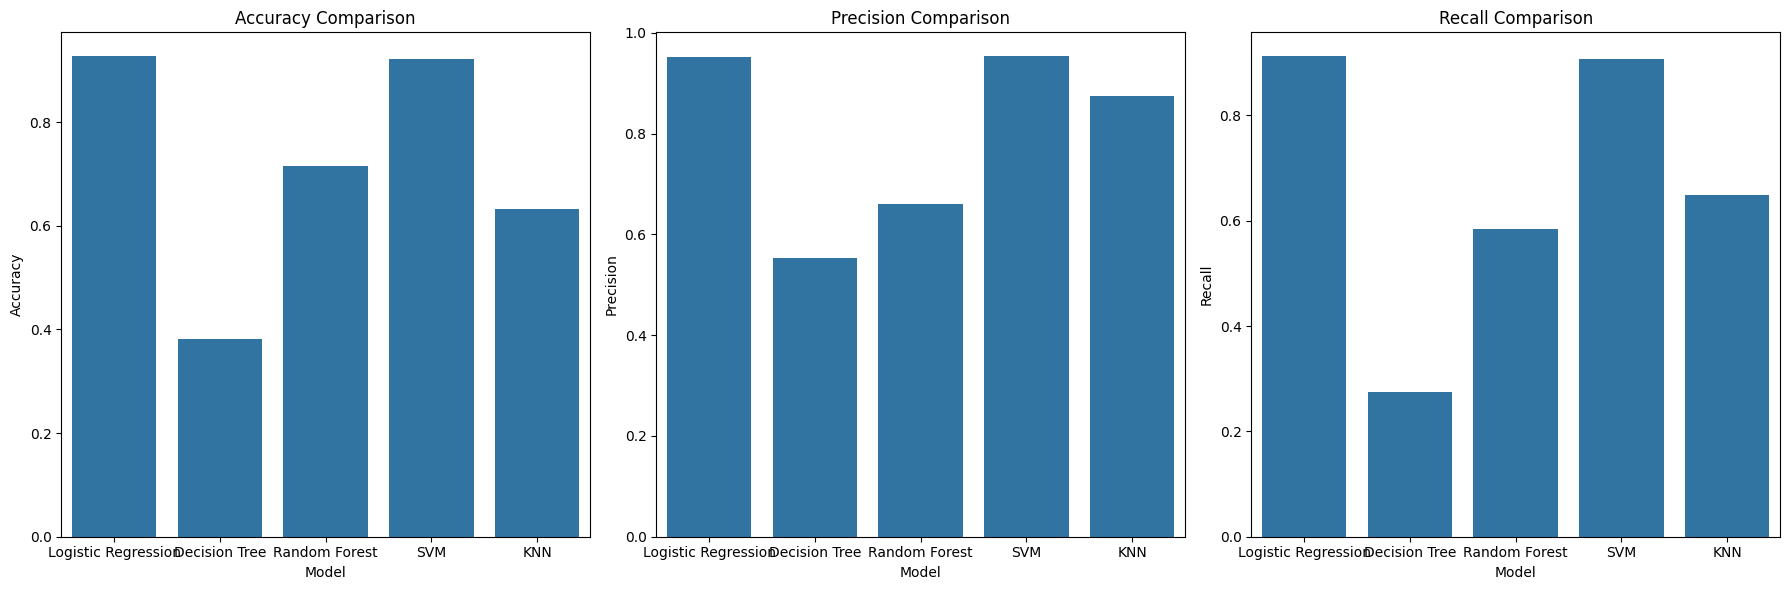

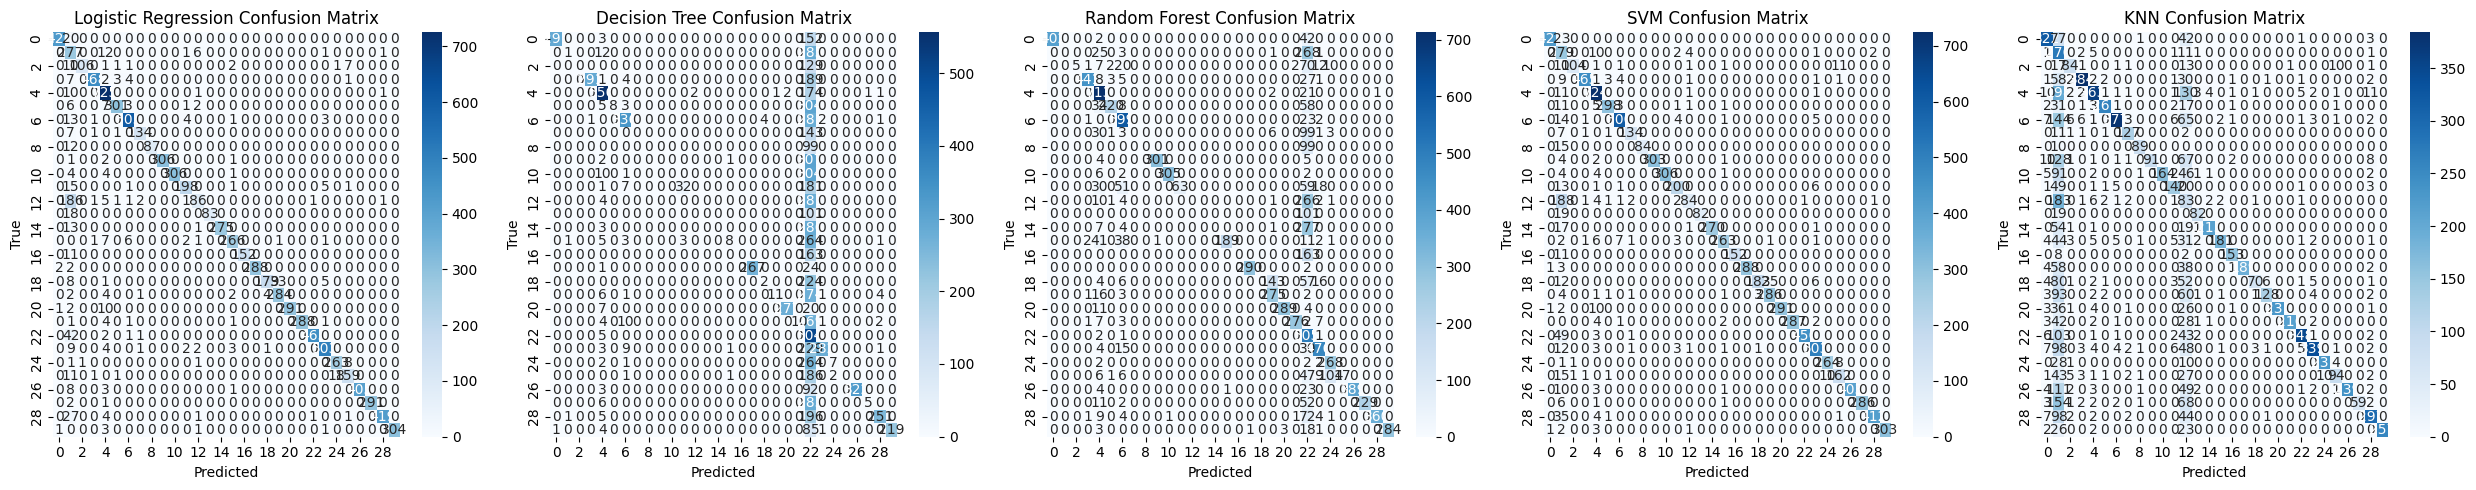

In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt


X = data_cleaned['Text']  # Feature (Text)
y = data_cleaned['Language']  # Target (Encoded Language)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_jobs=-1, max_depth=10),
    "SVM": SVC(kernel='linear', C=1),
    "KNN": KNeighborsClassifier()
}

# Store performance metrics
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": []
}

# Store confusion matrices for each model
confusion_matrices = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train model
    model.fit(X_train_tfidf, y_train)

    # Make predictions
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)

    # Store metrics
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)

    # Compute confusion matrix for all models
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = conf_matrix

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot comparison for Accuracy, Precision, and Recall
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Accuracy Plot
sns.barplot(x='Model', y='Accuracy', data=metrics_df, ax=axes[0])
axes[0].set_title('Accuracy Comparison')

# Precision Plot
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[1])
axes[1].set_title('Precision Comparison')

# Recall Plot
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[2])
axes[2].set_title('Recall Comparison')

plt.tight_layout()
plt.show()

# Plot confusion matrices
num_models = len(confusion_matrices)
fig, axes = plt.subplots(1, num_models, figsize=(5*num_models, 5))

# Ensure axes is iterable even if there's only one confusion matrix
if num_models == 1:
    axes = [axes]

# Plot confusion matrices
for i, (model_name, conf_matrix) in enumerate(confusion_matrices.items()):
    # Plot confusion matrix as heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()
